In [100]:
# Import libraries and custom module
import pandas as pd

from data_utils import one_hot_encoding, plot_geospatial_data, plot_data_distribution, scale_cols, plot_one_hot_boxplot, plot_one_hot_corr_matrix, plot_one_hot_significance, log_scaling, remove_outliers

In [101]:
# Import data
data = pd.read_csv(r'housing.csv')
# Create new calculated columns
rooms_per_household = data["total_rooms"] / data["households"]
bedrooms_per_person = data["total_bedrooms"] / data["population"]
people_per_household = data["population"] / data["households"]
# Create the new DataFrame while replacing the original columns
data.rename(columns = {'total_rooms': 'rooms_per_household', 'total_bedrooms': 'bedrooms_per_person', 'population': 'people_per_household'}, inplace = True)  # Drop old columns
data["rooms_per_household"] = rooms_per_household
data["bedrooms_per_person"] = bedrooms_per_person
data["people_per_household"] = people_per_household

print(data.describe())
# perform one-hot encoding
encoded_data = one_hot_encoding(data, 'ocean_proximity')

handledna_encoded_data = encoded_data.dropna()
encoded_data = handledna_encoded_data


          longitude      latitude  housing_median_age  rooms_per_household  \
count  20640.000000  20640.000000        20640.000000         20640.000000   
mean    -119.569704     35.631861           28.639486             5.429000   
std        2.003532      2.135952           12.585558             2.474173   
min     -124.350000     32.540000            1.000000             0.846154   
25%     -121.800000     33.930000           18.000000             4.440716   
50%     -118.490000     34.260000           29.000000             5.229129   
75%     -118.010000     37.710000           37.000000             6.052381   
max     -114.310000     41.950000           52.000000           141.909091   

       bedrooms_per_person  people_per_household    households  median_income  \
count         20433.000000          20640.000000  20640.000000   20640.000000   
mean              0.403304              3.070655    499.539680       3.870671   
std               0.243274             10.386050    38

c:\Users\mvran\OneDrive\Documents\Pfizer_Task\data_utils.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


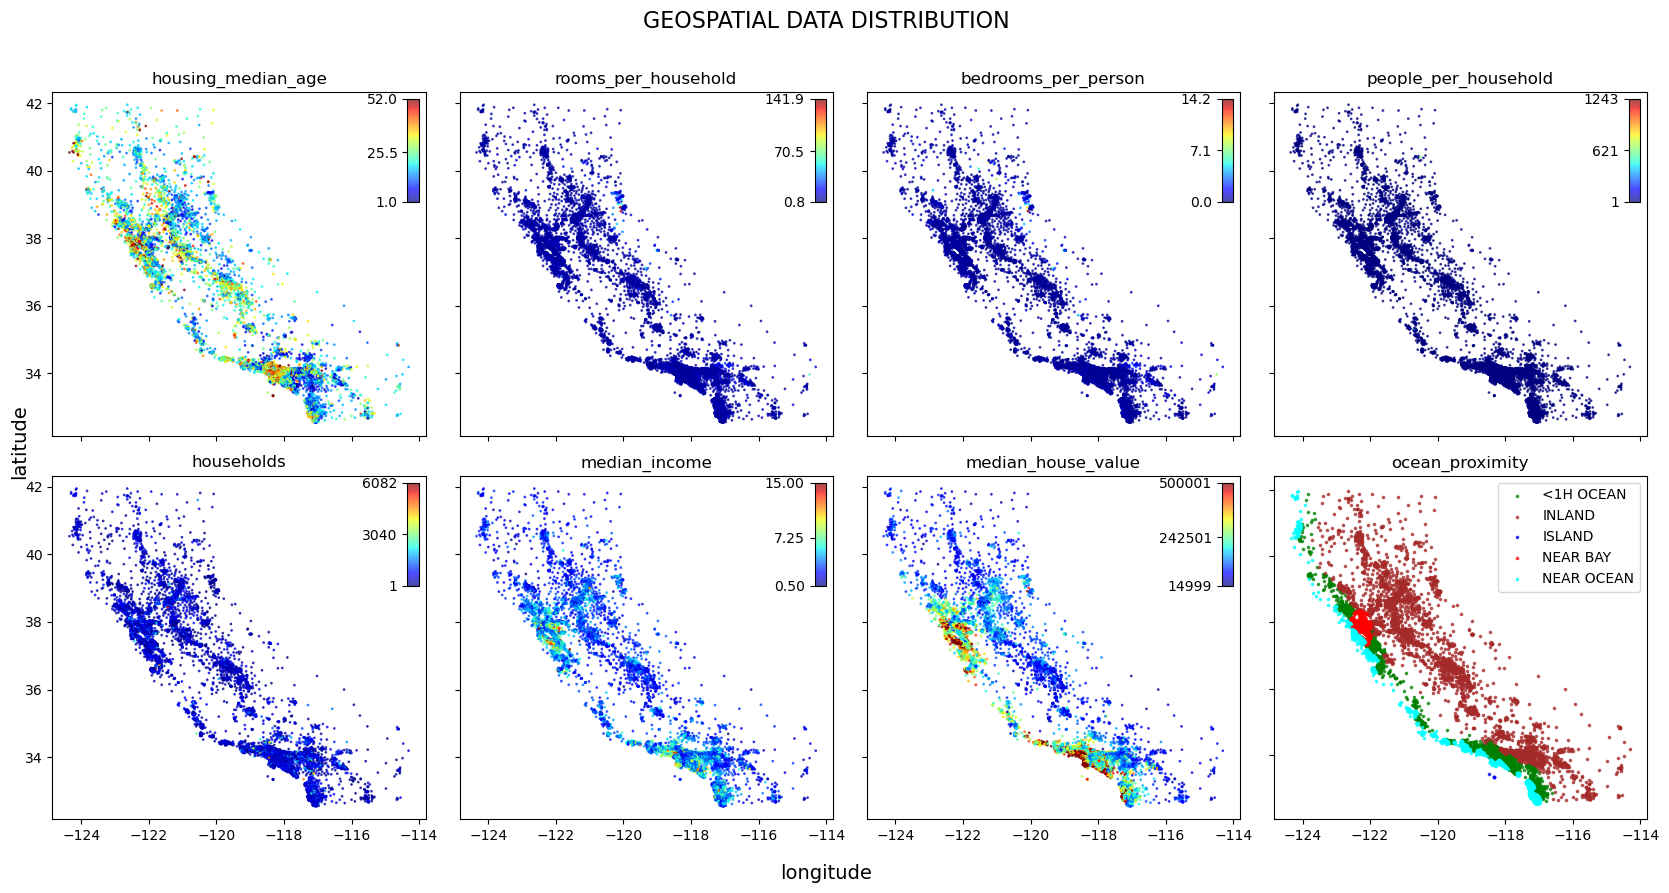

In [102]:
# Plot geospacial data
plot_geospatial_data(
    dataset=encoded_data,
    geo_cols=encoded_data.columns[0:2],
    feature_cols=encoded_data.columns[2:9], 
    one_hot_cols=encoded_data.columns[9:14],
    one_hot_title='ocean_proximity', 
    tot_rows=2, 
    tot_cols=4, 
    figsize=(17, 9),
    output_file="alt_geospatial_data.png")

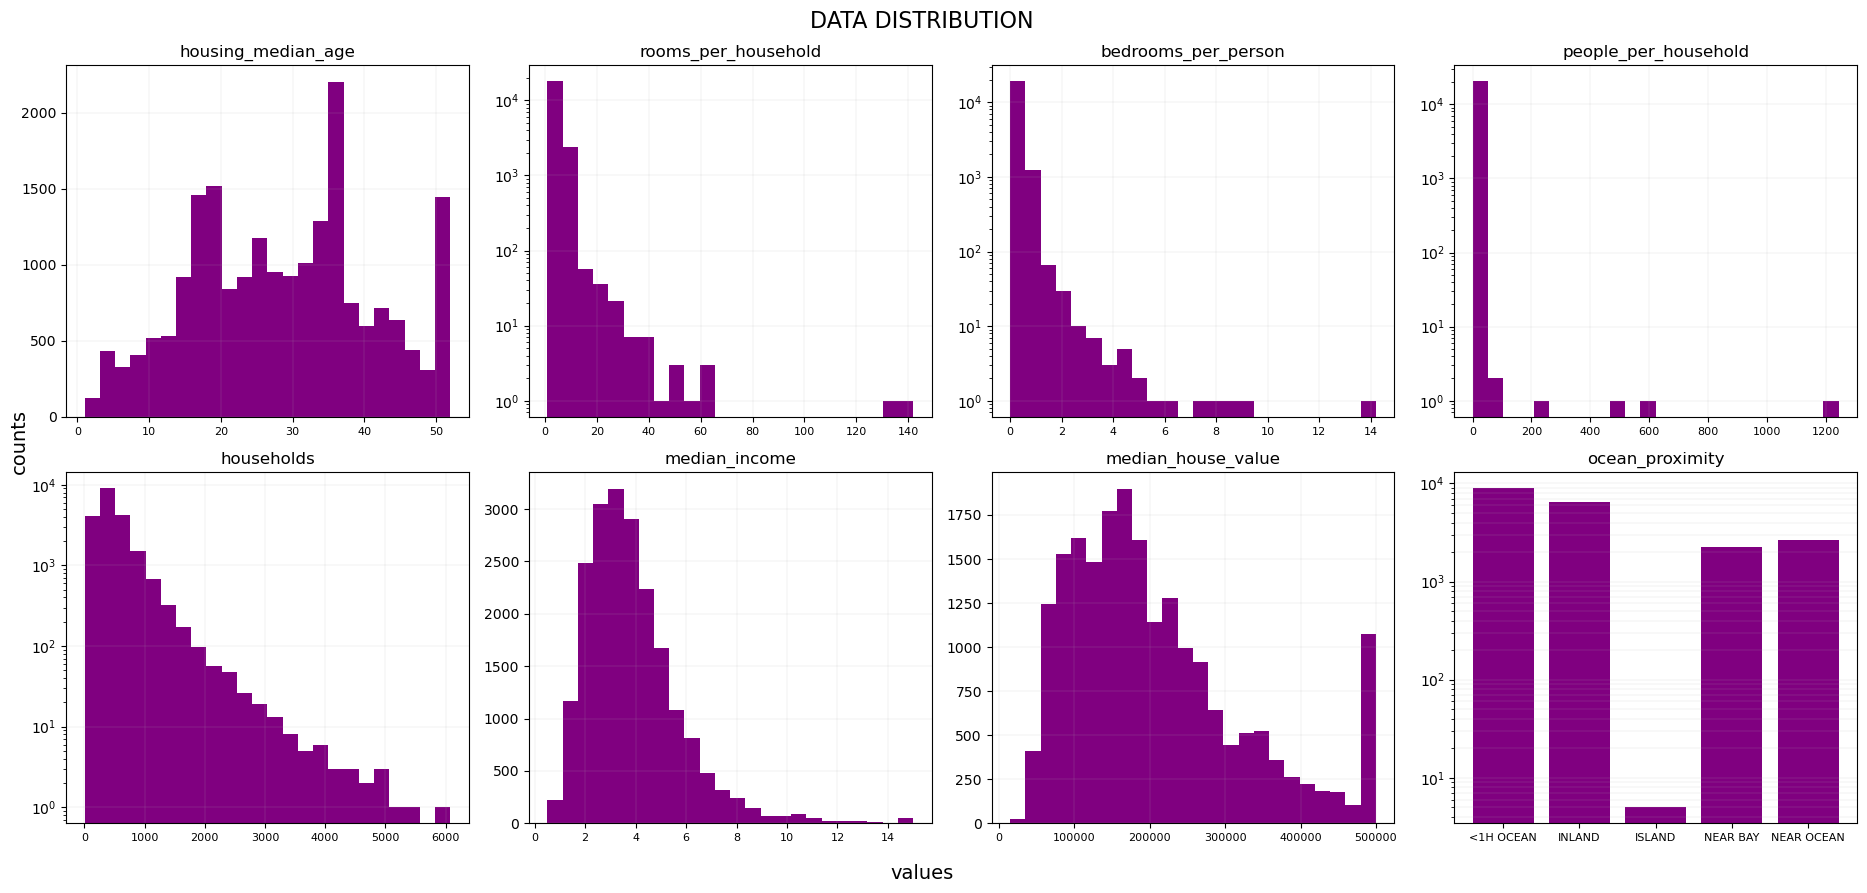

In [103]:
# Plot data distribution
plot_data_distribution(
    dataset=encoded_data, 
    feature_cols=encoded_data.columns[2:9], 
    one_hot_cols=encoded_data.columns[9:14], 
    one_hot_title='ocean_proximity', 
    bins=24, 
    tot_rows=2, 
    tot_cols=4, 
    figsize=(19, 9), 
    output_file="alt_data_distribution.png")

In [104]:
# Automatic log scale columns with wide range
encoded_data = log_scaling(encoded_data)

In [105]:
# Automatically remove outliers
encoded_data = remove_outliers(encoded_data, encoded_data.columns[2:9], threshold=5)
print(len(encoded_data))

20225


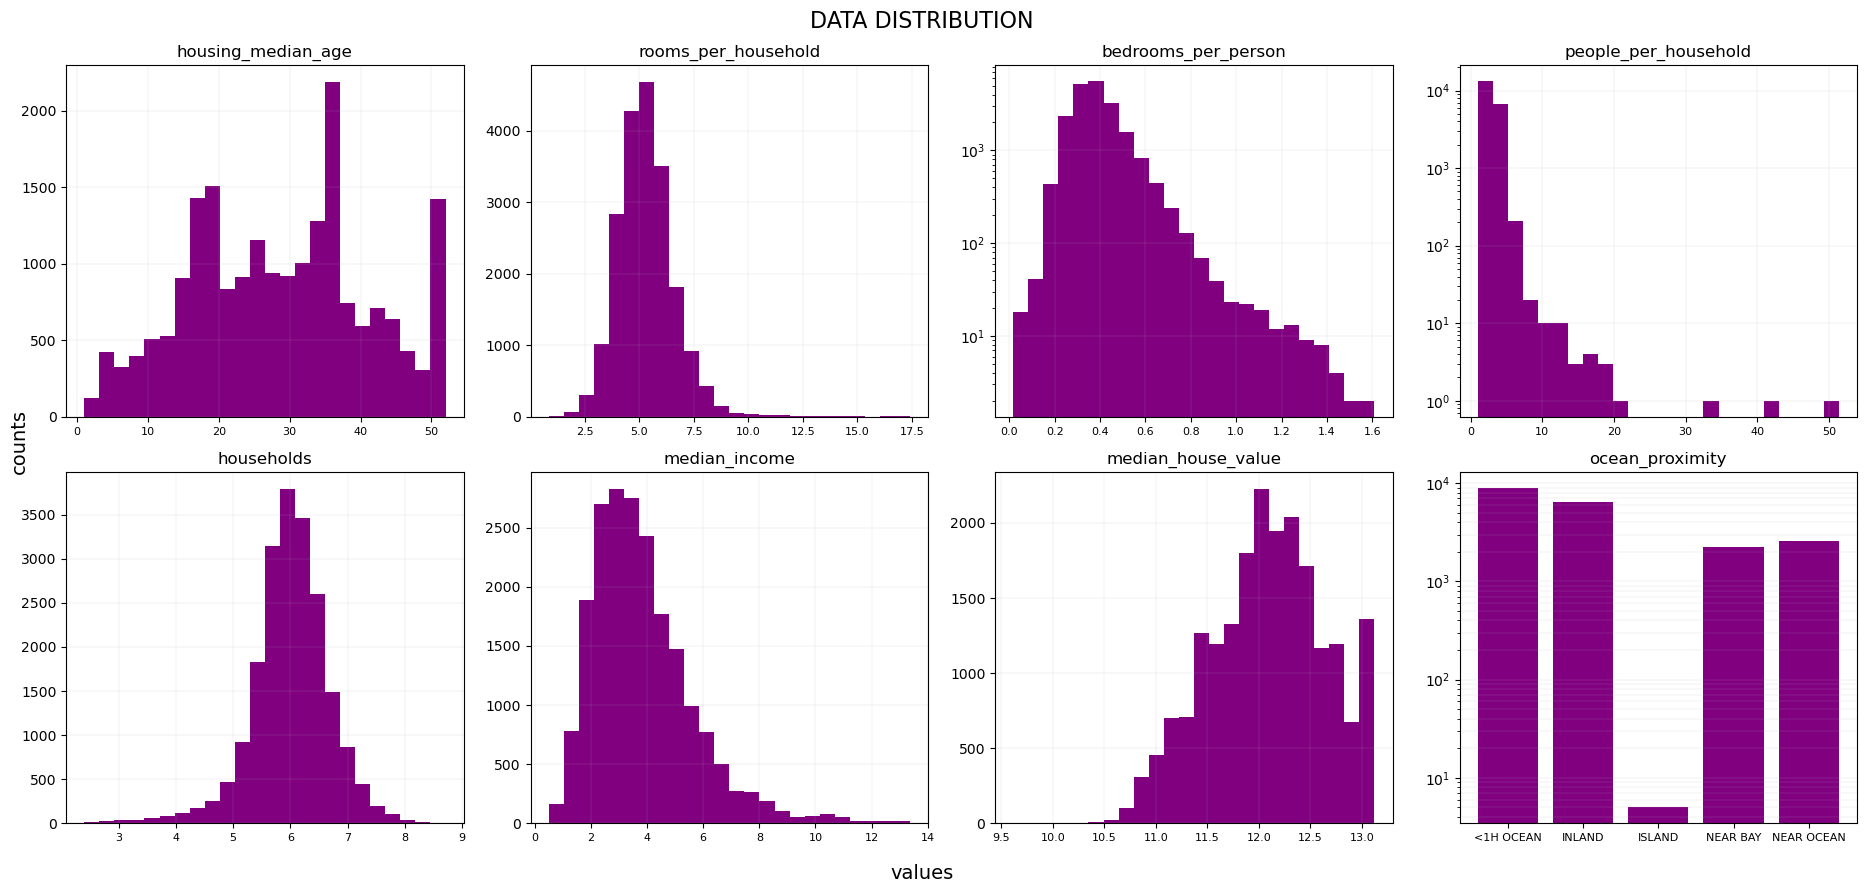

In [106]:
# Plot data distribution after log scaling
plot_data_distribution(
    dataset=encoded_data, 
    feature_cols=encoded_data.columns[2:9], 
    one_hot_cols=encoded_data.columns[9:14], 
    one_hot_title='ocean_proximity', 
    bins=24, 
    tot_rows=2, 
    tot_cols=4, 
    figsize=(19, 9), 
    output_file="alt_out_data_distribution.png")

In [107]:
# Scale data | Min-Max normalization
scaled_data = scale_cols(encoded_data, encoded_data.columns[2:9])

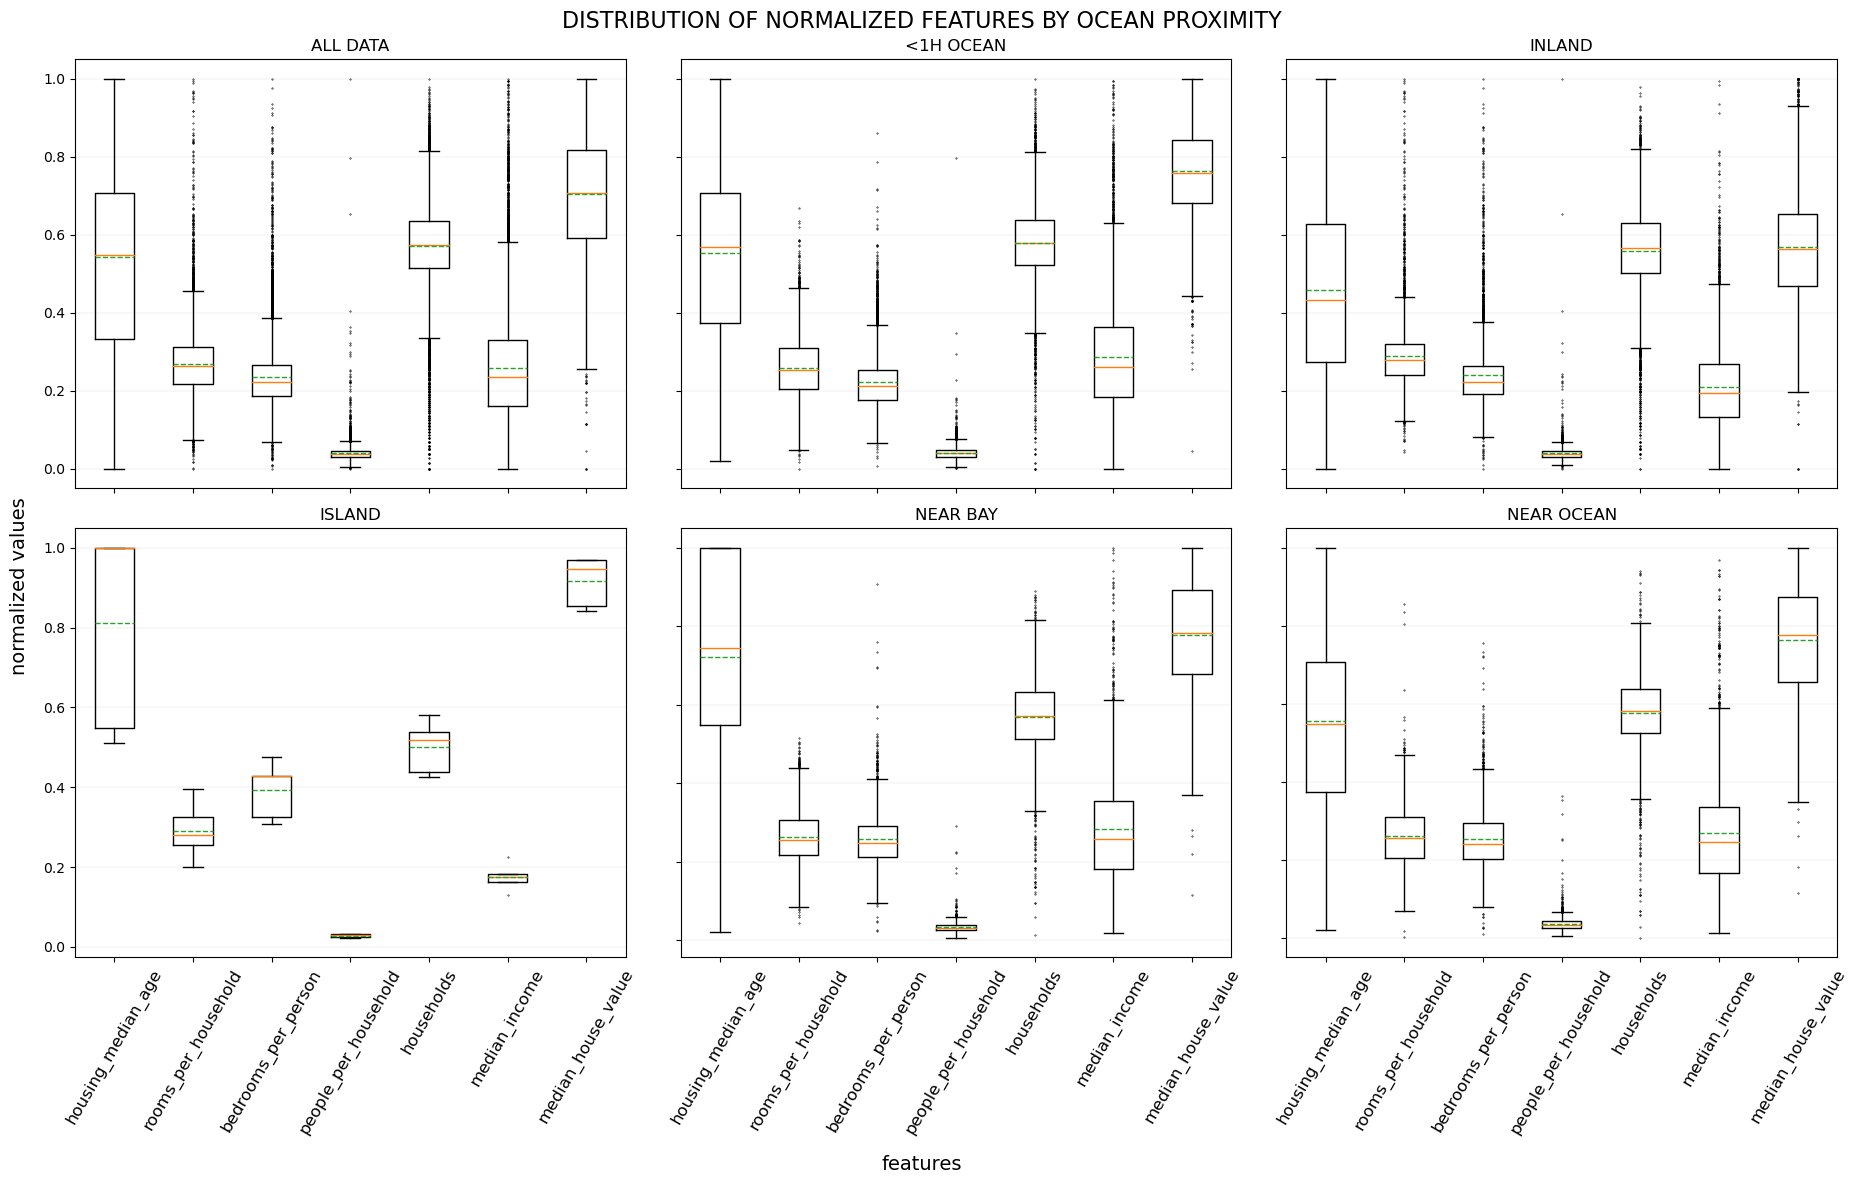

In [108]:
# Plot box plots
plot_one_hot_boxplot(
    dataset=scaled_data, 
    feature_cols=scaled_data.columns[2:9], 
    one_hot_cols=scaled_data.columns[9:14], 
    one_hot_title='OCEAN PROXIMITY', 
    tot_rows=2, 
    tot_cols=3, 
    figsize=(19,12), 
    output_file="alt_box_plot.png")

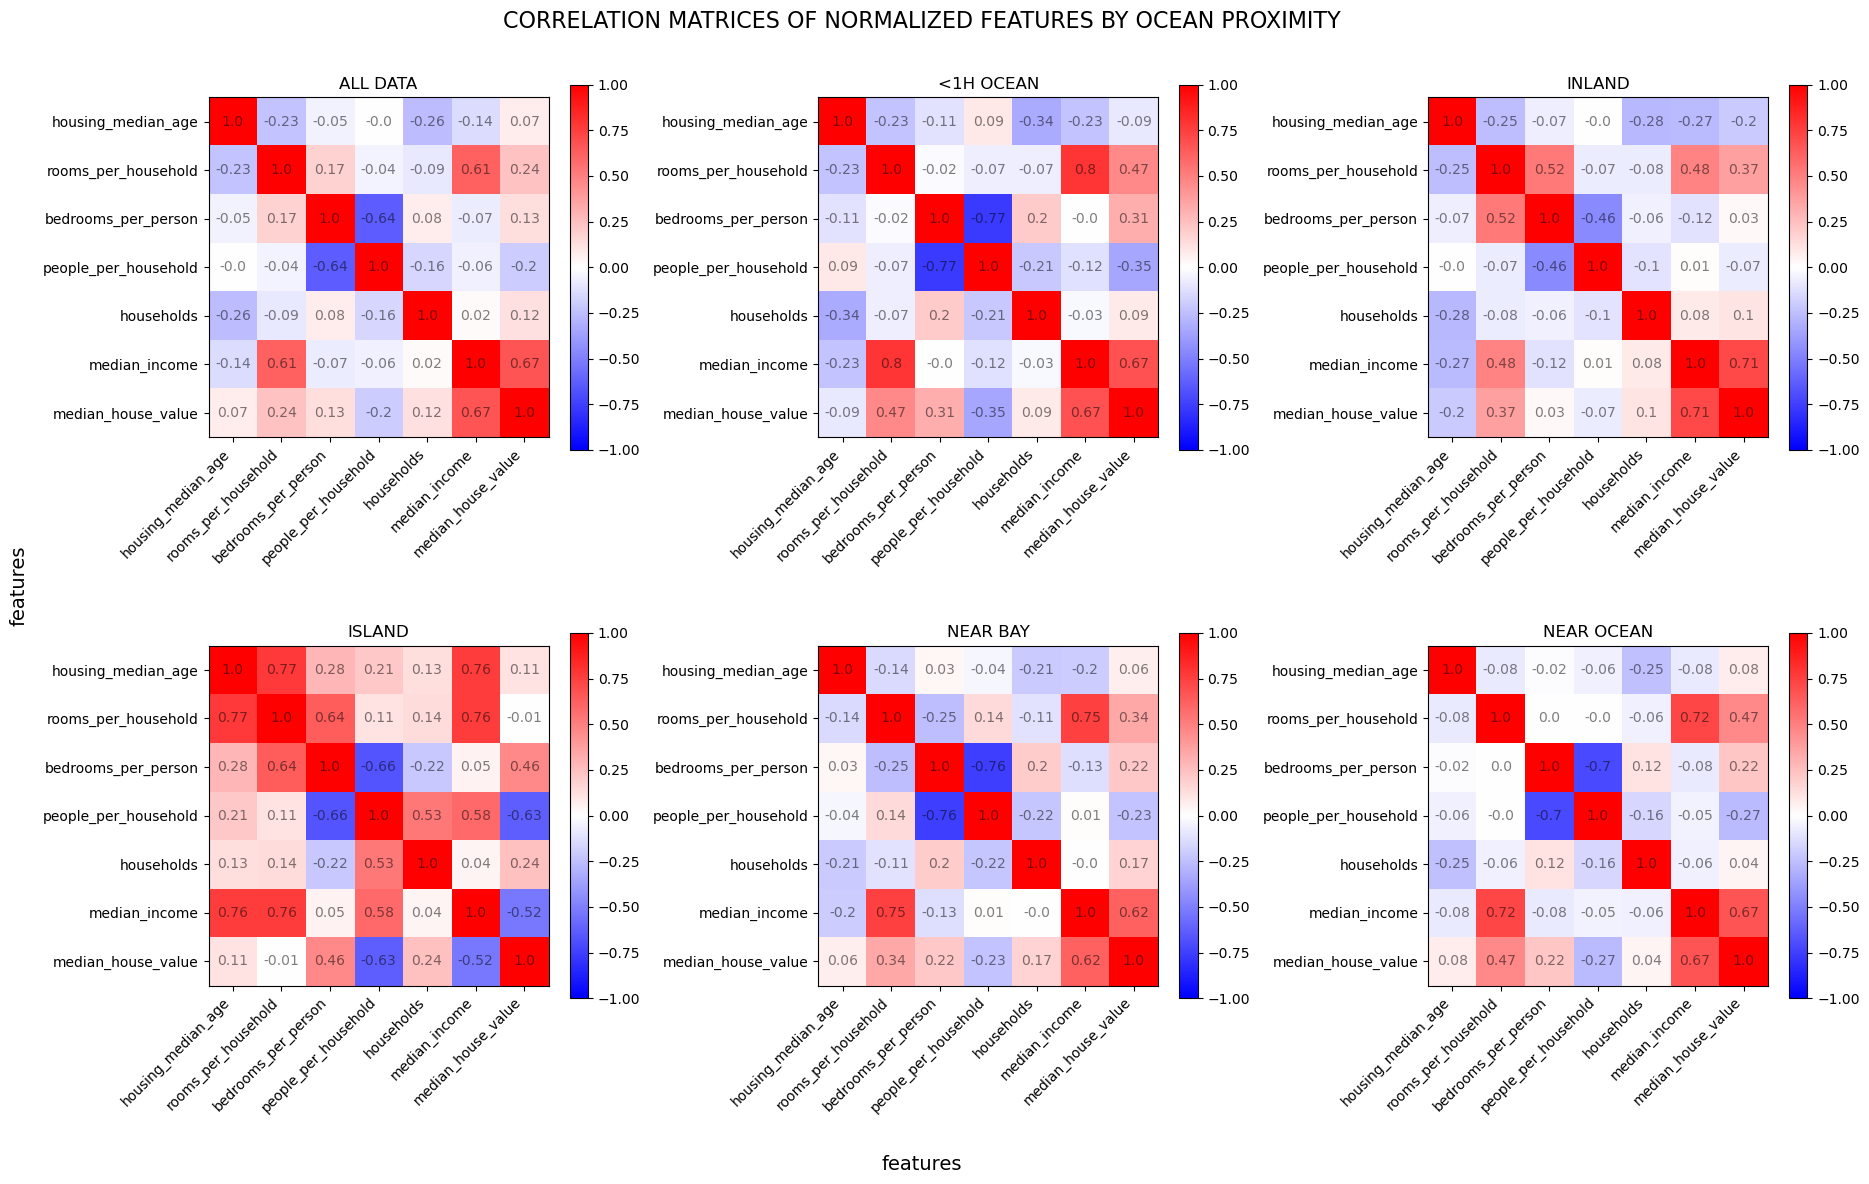

In [109]:
# Plot correlation matrices by category
plot_one_hot_corr_matrix(
    dataset=scaled_data, 
    feature_cols=scaled_data.columns[2:9], 
    one_hot_cols=scaled_data.columns[9:14], 
    one_hot_title='OCEAN PROXIMITY', 
    tot_rows=2, 
    tot_cols=3, 
    figsize=(19,12), 
    output_file="alt_correlation_matrix.png")

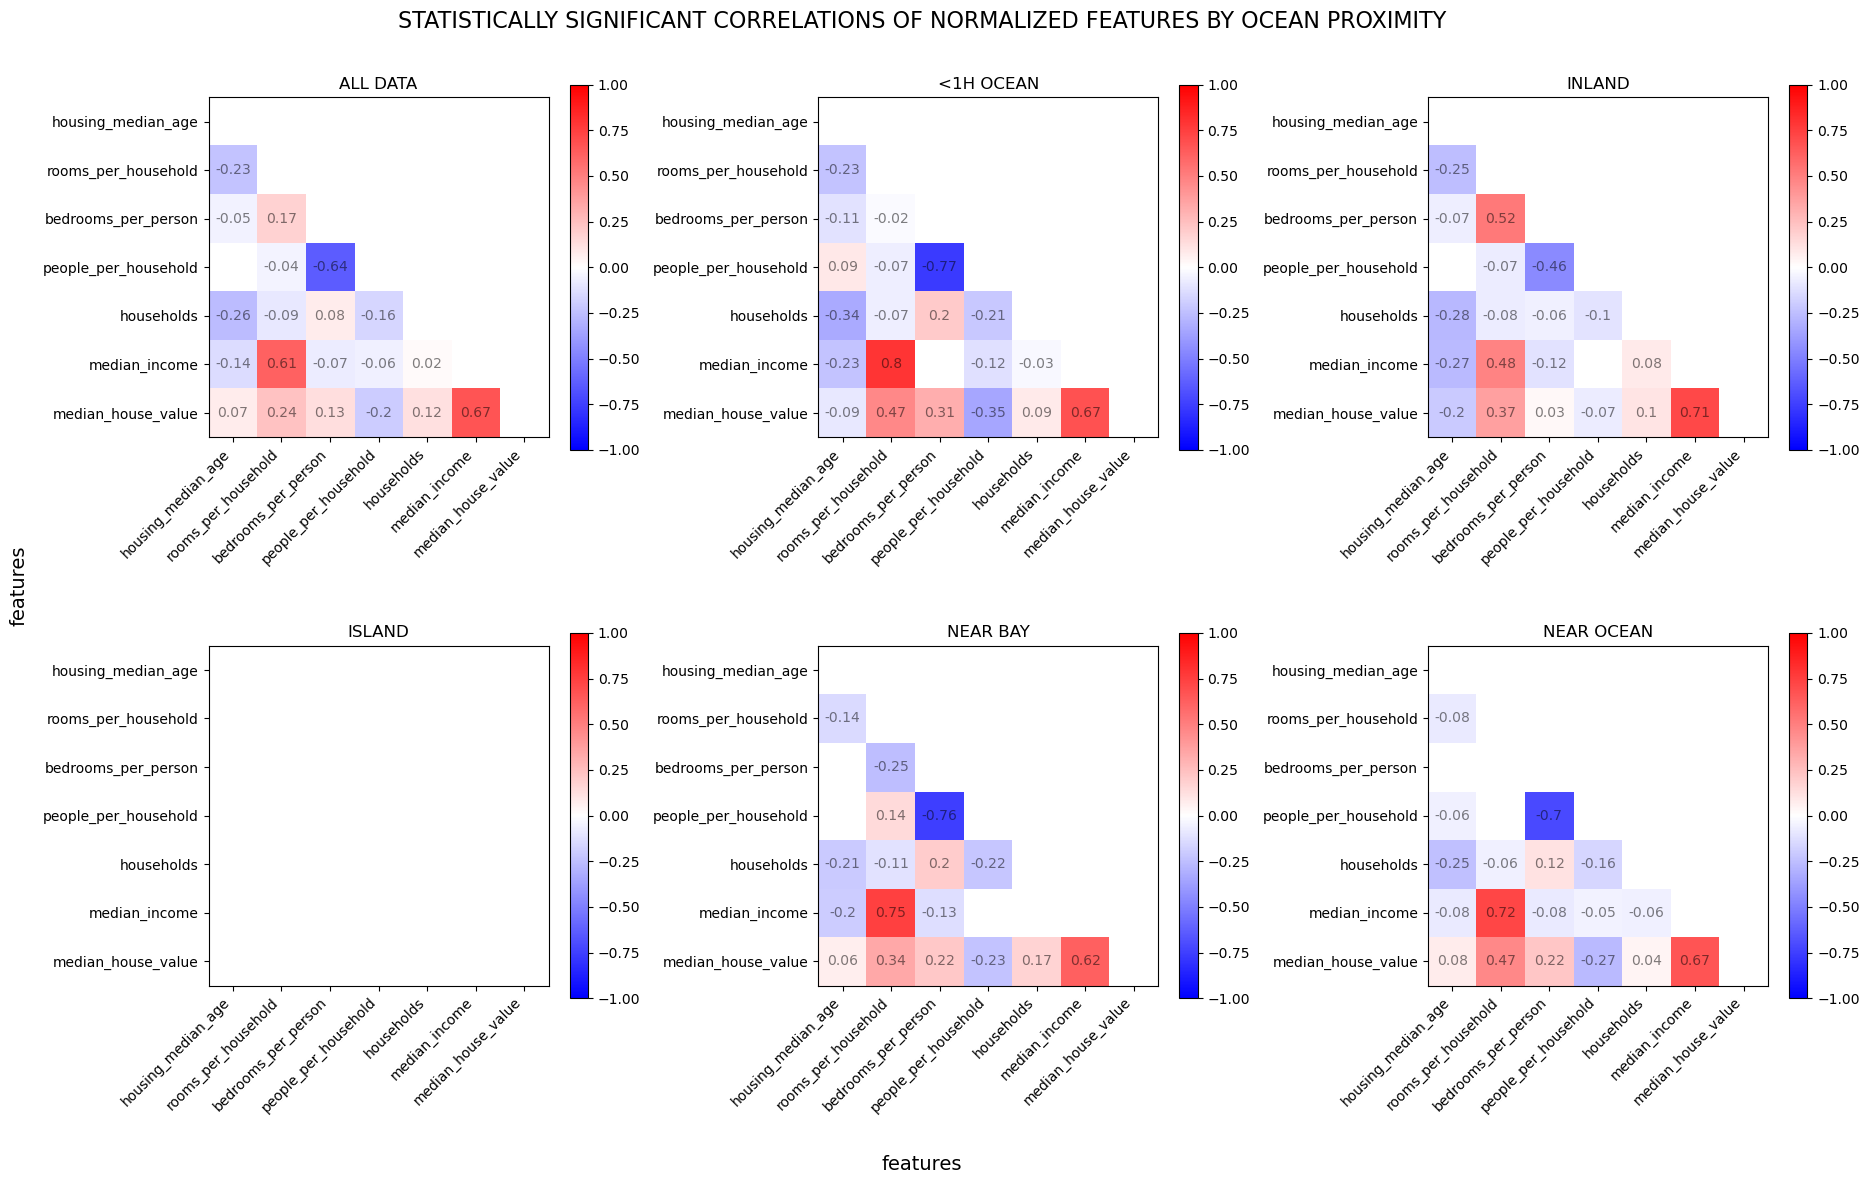

In [110]:
# Plot correlation matrices by category filtered
plot_one_hot_significance(
    dataset=scaled_data, 
    feature_cols=scaled_data.columns[2:9], 
    one_hot_cols=scaled_data.columns[9:14], 
    one_hot_title='OCEAN PROXIMITY', 
    athreshold=0.05,
    tot_rows=2, 
    tot_cols=3, 
    figsize=(19,12), 
    output_file="alt_sig_corr_matrix.png")